# MATH 210 Introduction to Matheamtical Computing

## March 27, 2023

* Euler's method for Systems
* `odeint` for systems

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

## Euler's method

From last time, consider the second order constant coefficient equation:

$$
ay'' + by' + cy = F(t)
$$

Apply Euler's method to both $y$ and $y'$. Choose $a = 1$, $b = 0$, $c = 1$, and $F(t) = 0$ so that the exact solution is $y(t) = \sin(t)$.

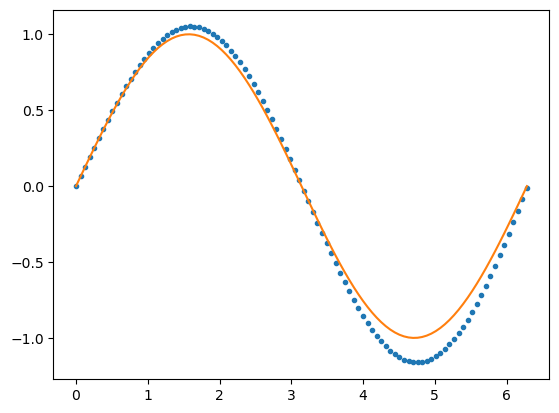

In [3]:
N = 100; tf = 2*np.pi;
t = np.linspace(0,tf,N)
h = tf/(N - 1)

a = 1; b = 0; c = 1;
F = lambda t: 0.
y0 = 0; v0 = 1;

y = np.zeros(N)
dy = np.zeros(N)
y[0] = y0
dy[0] = v0

for n in range(0,N-1):
    y[n + 1] = y[n] + dy[n]*h
    dy[n + 1] = dy[n] + (F(t[n]) - b*dy[n] - c*y[n])/a*h

plt.plot(t,y,'.',t,np.sin(t))
plt.show()

Let $u_0 = y$ and $u_1 = y'$ and setup first order system:

\begin{align*}
u_0' &= u_1 \\
u_1' &= (F(t) - bu_1 - cu_0)/a
\end{align*}

Modify the code above to use only $u_0$ and $u_1$.

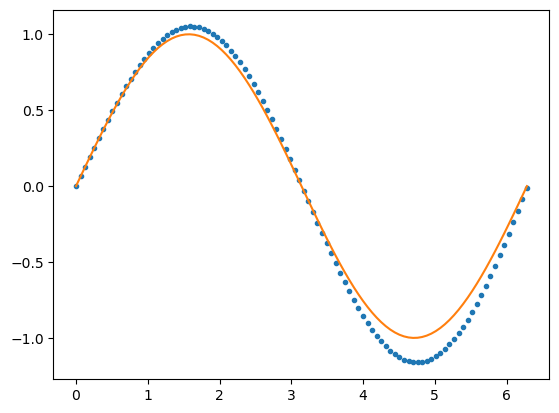

In [5]:
N = 100; tf = 2*np.pi;
t = np.linspace(0,tf,N)
h = tf/(N - 1)

a = 1; b = 0; c = 1;
F = lambda t: 0.
y0 = 0; v0 = 1;

# u' = f(t,u)
# f(t,u) = [u0',u1',....]
f = lambda t,u: np.array([u[1],(F(t) - b*u[1] - c*u[0])])
u0 = [y0,v0]

def odeEuler(f,t,u0):
    U = np.zeros((len(t),len(u0)))
    U[0,:] = u0
    for n in range(0,len(t)-1):
        h = t[n + 1] - t[n]
        U[n + 1,:] = U[n,:] + f(t[n],U[n,:])*h
    return U

# U = [u[i,j]] where u[i,j] is and approximation of uj(ti)
U = odeEuler(f,t,u0)
plt.plot(t,y,'.',t,np.sin(t))
plt.show()

## Predator-Prey Models

Let $x(t)$ be the number of prey (ie. rabbits) at time $t$ and let $y(t)$ be the number of predators (ie. wolves) at time $t$. Then a population model is given by

\begin{align*}
x' & = \alpha x - \beta xy \\
y' & = \delta xy - \gamma y
\end{align*}

Let $u_0 = x$ and let $u_1 = y$.

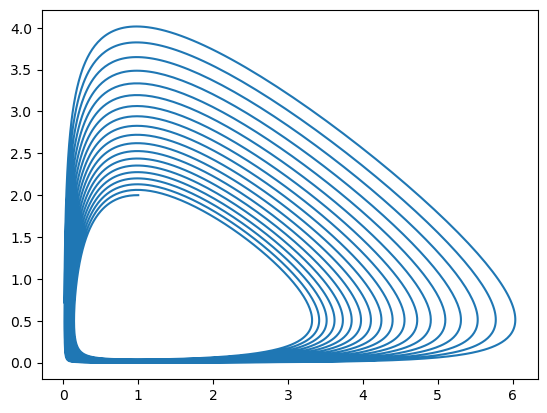

In [10]:
alpha = 2/3; beta = 4/3; gamma = 1; delta = 1; tf = 200;
f = lambda t,u: np.array([alpha*u[0] - beta*u[0]*u[1],delta*u[0]*u[1] - gamma*u[1]])
t = np.linspace(0,tf,100*tf)
u0 = [1,2];
U = odeEuler(f,t,u0)

# Plots prey vs. predator
plt.plot(U[:,0],U[:,1])
plt.show()